In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import geopy.distance
from math import radians,cos,sin,asin,sqrt
import folium
import datetime
from folium.plugins import HeatMap
from scipy.stats import ttest_ind

# from mpl_toolkits.basemap import Basemap
from matplotlib import cm #Colormap

#Animation Modules
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

%matplotlib inline


In [2]:
dataset = pd.read_csv('Minor-Project-Dataset.csv')
dataset.head()

,Lat,Lon,Base,Month,Day,Day-of-week,Day-of-week-num,hours,minutes
0,40.7690,-73.9549,B02512,4,1,Tuesday,1,0,11
1,40.7267,-74.0345,B02512,4,1,Tuesday,1,0,17
2,40.7316,-73.9873,B02512,4,1,Tuesday,1,0,21
3,40.7588,-73.9776,B02512,4,1,Tuesday,1,0,28
4,40.7594,-73.9722,B02512,4,1,Tuesday,1,0,33


In [3]:
dataset[['Lat_Rounded','Lon_Rounded','hours']] = dataset[['Lat', 'Lon','hours']].round(3)

[Text(0.5, 1.0, 'location')]

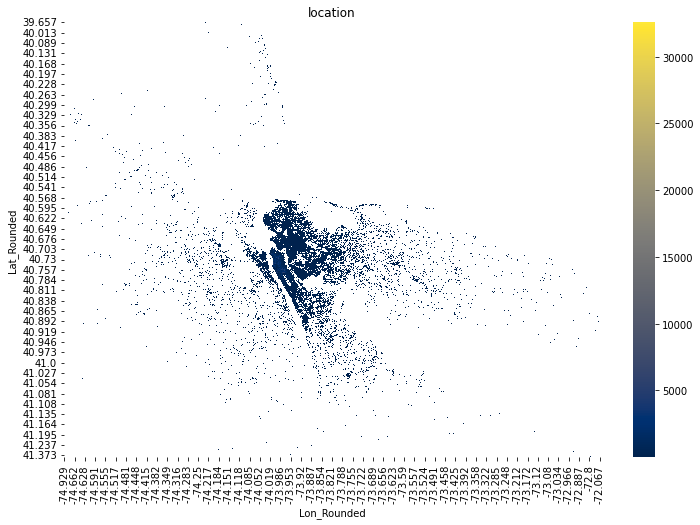

In [4]:
plt.figure(figsize = (12,8))
df = dataset.groupby(["Lat_Rounded", "Lon_Rounded"]).apply(lambda x: len(x))
df = df.unstack()
ax = sns.heatmap(df, annot=False, cmap=cm.cividis)
ax.set(title = "location")

In [5]:
def makeheatmap(data):
    plt.figure(figsize = (12, 8))
    df = dataset.groupby(["Lat_Rounded", "Lon_Rounded"]).apply(lambda x: len(x))
    df = df.unstack()
    ax = sns.heatmap(df, annot=False)
    ax.set(title = "location")


In [6]:
data_0_6 = dataset.loc[ dataset["hours"].isin([0, 1, 2, 3, 4, 5]) ]
data_6_12 = dataset.loc[ dataset["hours"].isin([6, 7, 8, 9, 10, 11]) ]
data_12_18 = dataset.loc[ dataset["hours"].isin([12, 13, 14, 15, 16, 17]) ]
data_18_0 = dataset.loc[ dataset["hours"].isin([18, 19, 20, 21, 22, 23]) ]
len(data_0_6), len(data_6_12), len(data_12_18), len(data_18_0)

(404384, 1011629, 1522010, 1596304)

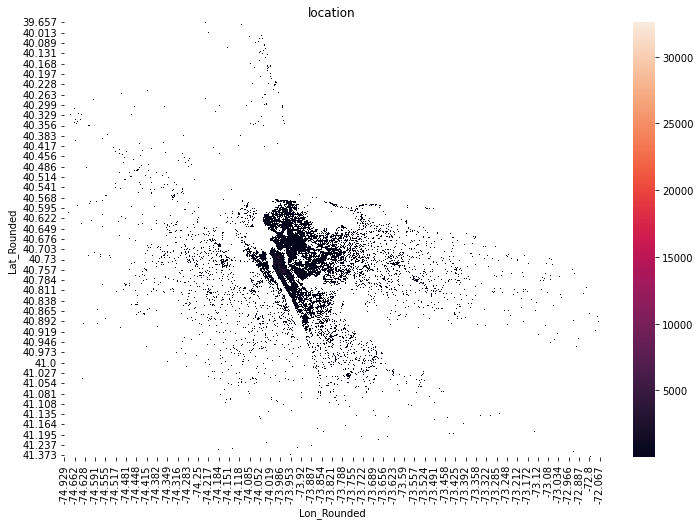

In [7]:
makeheatmap(data_0_6)

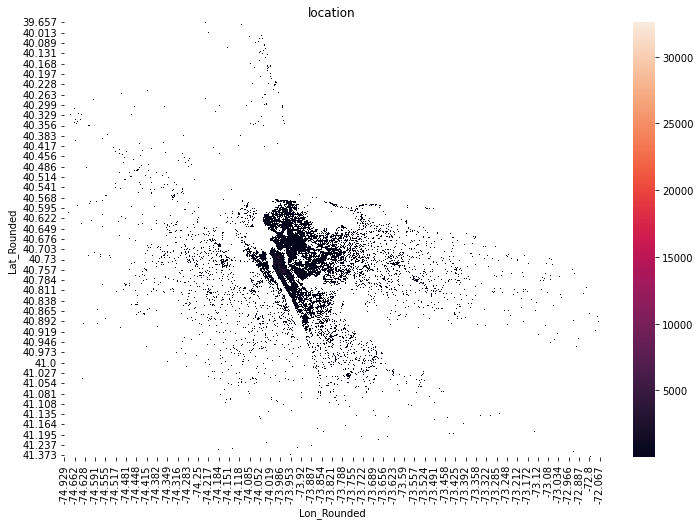

In [8]:
makeheatmap(data_6_12)

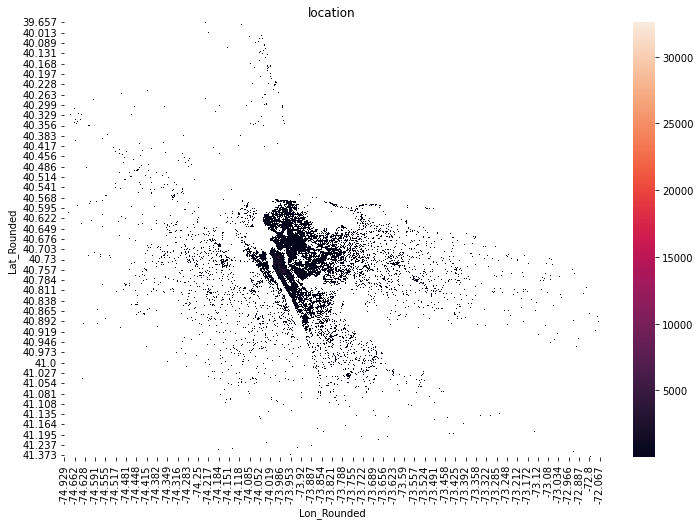

In [9]:
makeheatmap(data_12_18)

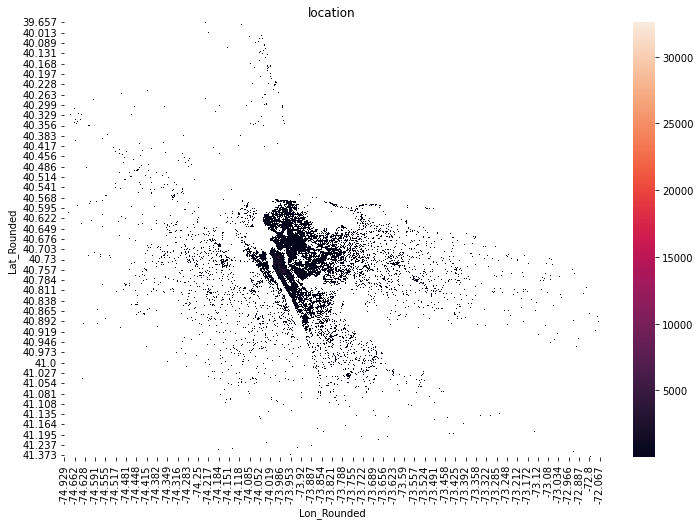

In [10]:
makeheatmap(data_18_0)

In [11]:
#Setting up the limits
top, bottom, left, right = 41, 40.55, -74.3, -73.6

#Extracting the Longitude and Latitude of each pickup in our dataset
Longitudes = dataset['Lon'].values
Latitudes  = dataset['Lat'].values

In [12]:
data_reduced = dataset.drop_duplicates(['Lat','Lon'])

Text(0.5, 1.0, 'New York Uber Pickups from April to September 2014')

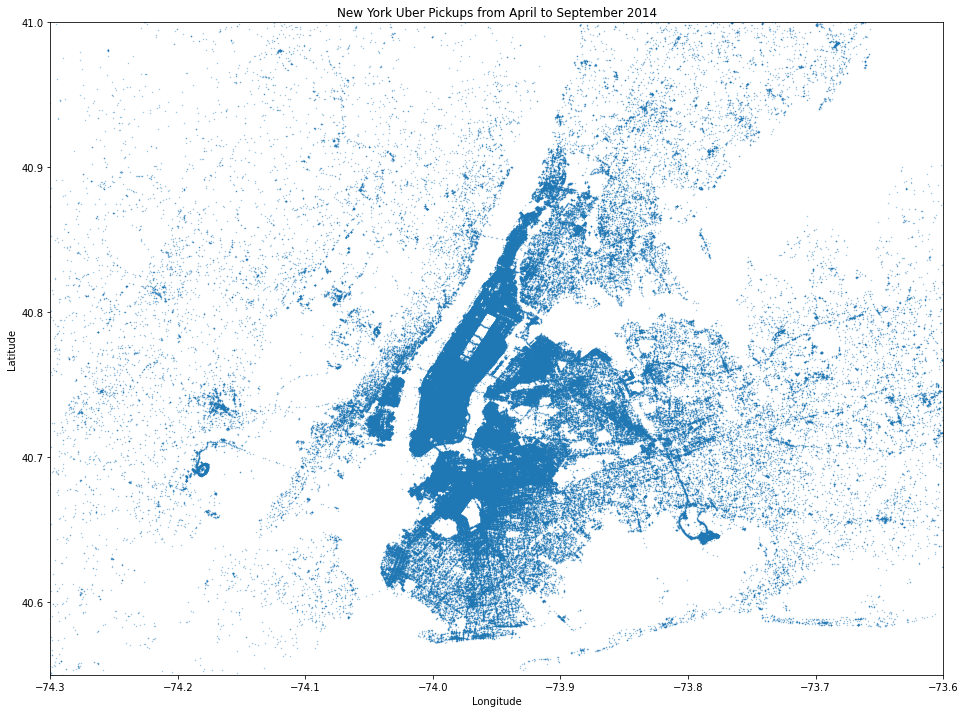

In [13]:
Longitudes_reduced = data_reduced['Lon']
Latitudes_reduced  = data_reduced['Lat']
%matplotlib inline

plt.figure(figsize=(16, 12))

plt.plot(Longitudes_reduced, Latitudes_reduced, '.', ms=.8, alpha=.5)

plt.ylim(top=top, bottom=bottom)
plt.xlim(left=left, right=right)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York Uber Pickups from April to September 2014')
